In [32]:
import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import scipy.stats as st

In [33]:
y = np.array([10,20,1])

In [35]:
with pm.Model() as m:
    
    p = pm.Dirichlet('p', a = np.ones(3))
    obs = pm.Multinomial('observed',n=y.sum(), p = p, observed = y)

In [36]:
with m:
    prior = pm.sample_prior_predictive()
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 690.21it/s]


In [47]:
data = az.from_pymc3(
    trace=trace,
    prior=prior,
    posterior_predictive=posterior_predictive,
    model=m,
    coords={'categories': ['CAT1', 'CAT2', 'CAT3'], 'individuals' : ['User1']},
    dims={'p': ['categories'], 'obs' : ['individuals']},
)
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

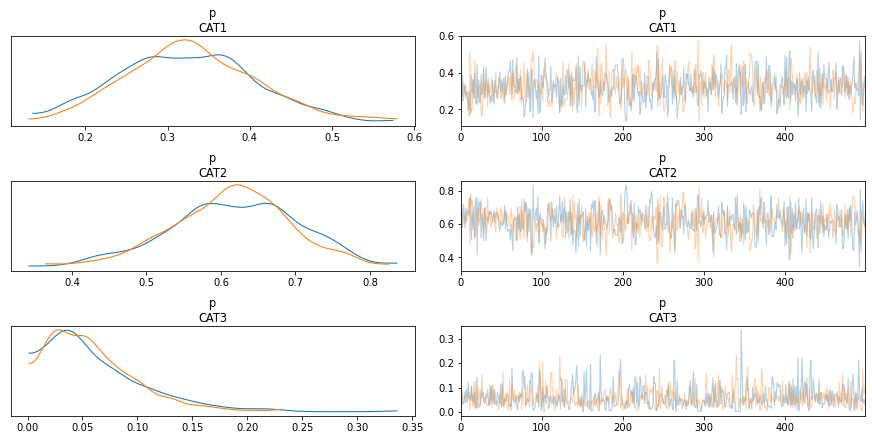

In [48]:
az.plot_trace(data);

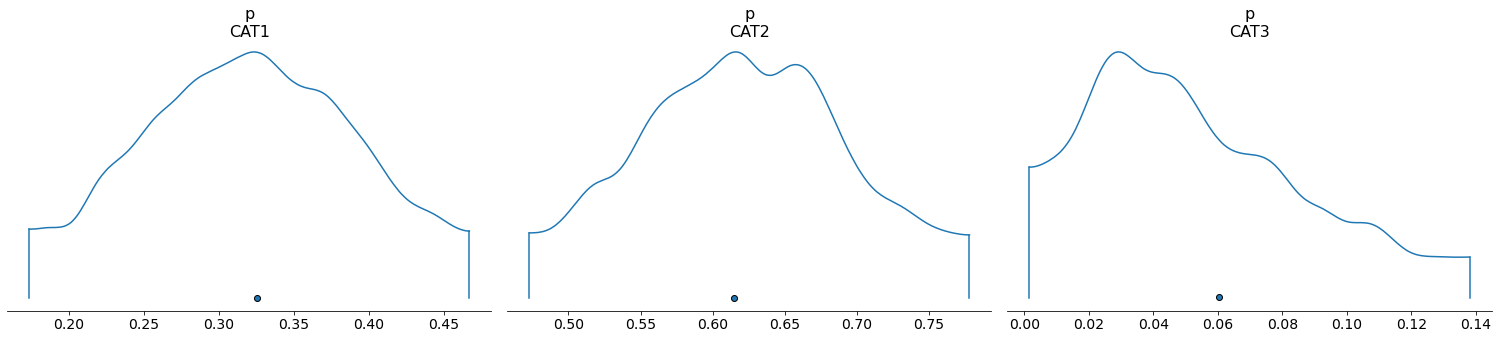

In [49]:
az.plot_density(data);

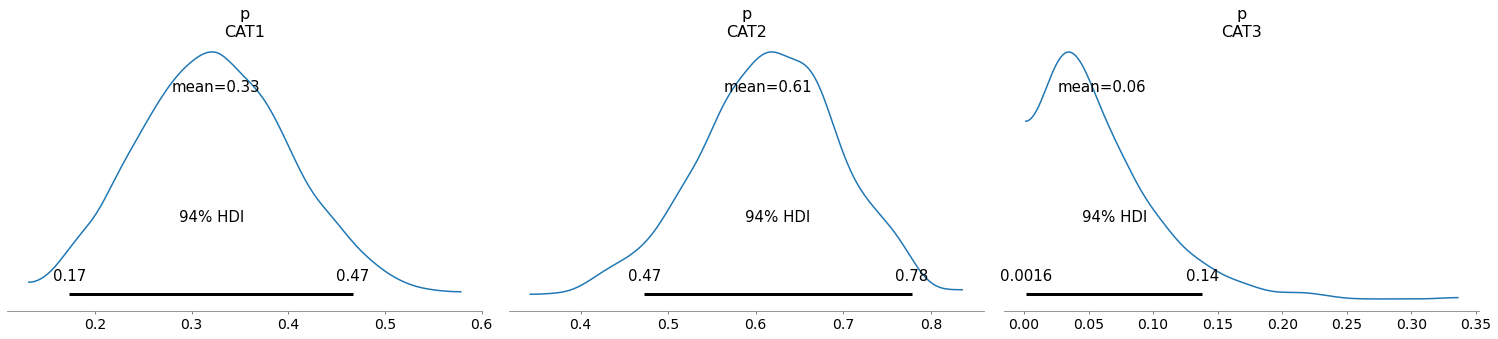

In [50]:
az.plot_posterior(data);

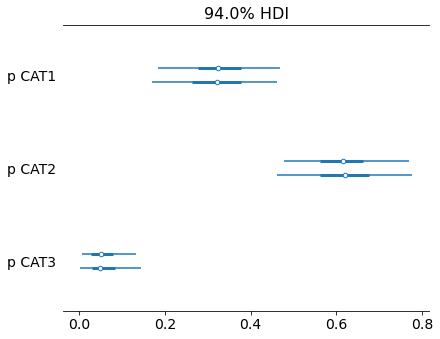

In [52]:
az.plot_forest(data);

<IPython.core.display.Javascript object>


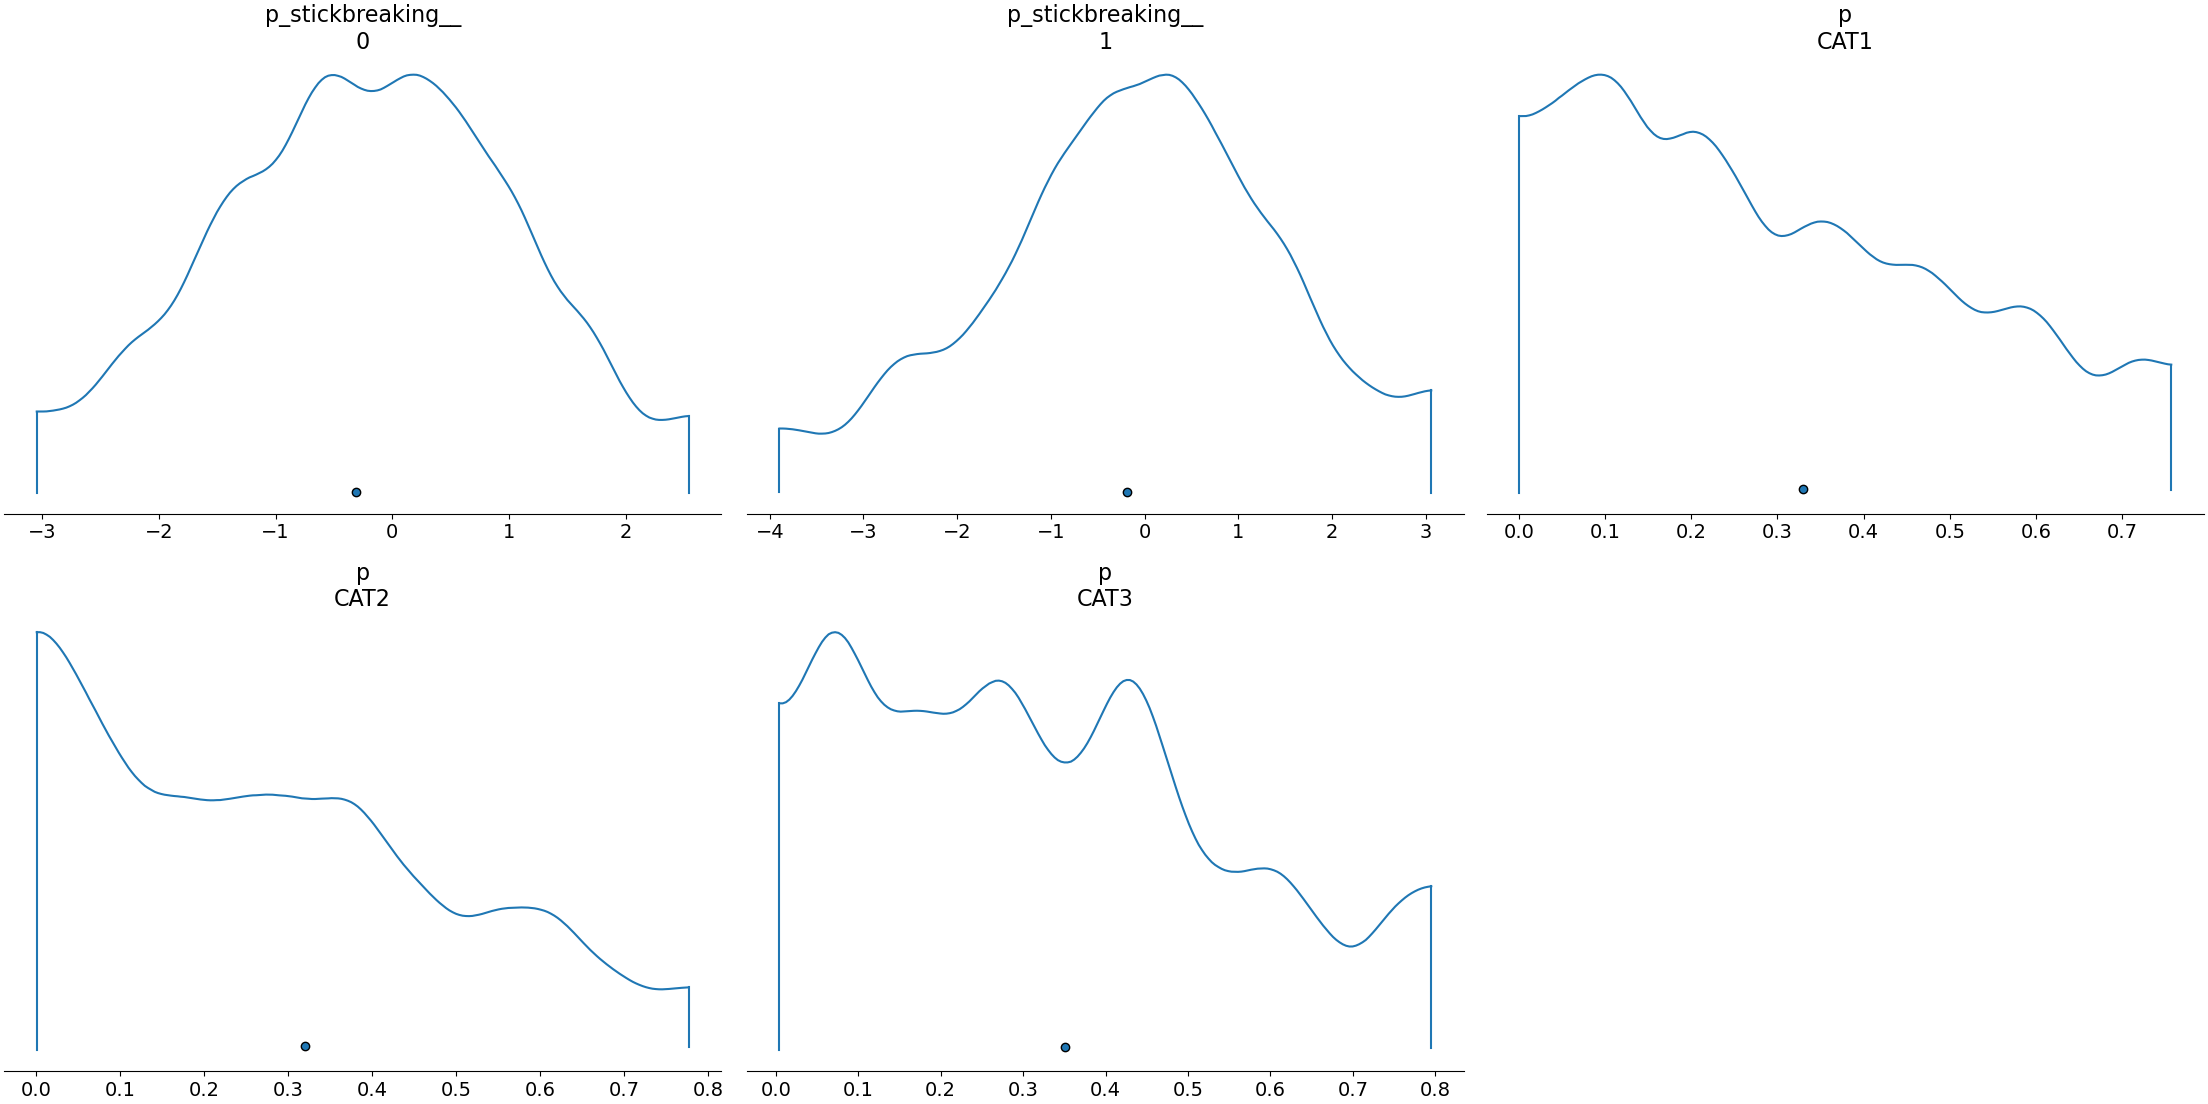

In [81]:
az.plot_density(data.prior);

In [93]:
az.convert_to_inference_data(data.posterior)

Inference data with groups:
	> posterior

In [69]:
pm.trace_to_dataframe(trace)

,p__0,p__1,p__2
0,0.448031,0.514960,0.037009
1,0.224645,0.698255,0.077099
2,0.387983,0.579059,0.032959
3,0.247653,0.717810,0.034536
4,0.288622,0.672977,0.038401
...,...,...,...
995,0.341838,0.653488,0.004674
996,0.186964,0.640199,0.172837
997,0.318347,0.605611,0.076042
998,0.318347,0.605611,0.076042
